In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
TRAIN_FOLDER_PATH = '../data/train/'

In [6]:
sizes = []
for r, _, f in os.walk(TRAIN_FOLDER_PATH):
    for file in f:
        if file.endswith(".png"):
            with Image.open(os.path.join(r, file)) as img:
                w, h = img.size
                sizes.append([w, h])

In [7]:
data = np.array(sizes)
df = pd.DataFrame(data = data, columns = ['x', 'y'])

In [8]:
# Size information

x_max = df['x'].max()
x_min = df['x'].min()
y_max = df['y'].max()
y_min = df['y'].min()

# where X = width and Y = hight

values = {
    "Max X": df[df['x'] == x_max].values[0],
    "Min X": df[df['x'] == x_min].values[0],
    "Max Y": df[df['y'] == y_max].values[0],
    "Min Y": df[df['y'] == y_min].values[0]
}

values_df = pd.DataFrame.from_dict([values])
values_df


,Max X,Max Y,Min X,Min Y
0,"[364, 340]","[208, 382]","[46, 79]","[55, 40]"


In [9]:
x_median = df['x'].median()
y_median = df['y'].median()
x_mean = df['x'].mean()
y_mean = df['y'].mean()

print("Median of X: {}".format(x_median))
print("Median of Y: {}".format(y_median))

print("Mean of X: {:.4f}".format(x_mean))
print("Mean of Y: {:.4f}".format(y_mean))

Median of X: 130.0
Median of Y: 130.0
Mean of X: 132.3891
Mean of Y: 132.9701


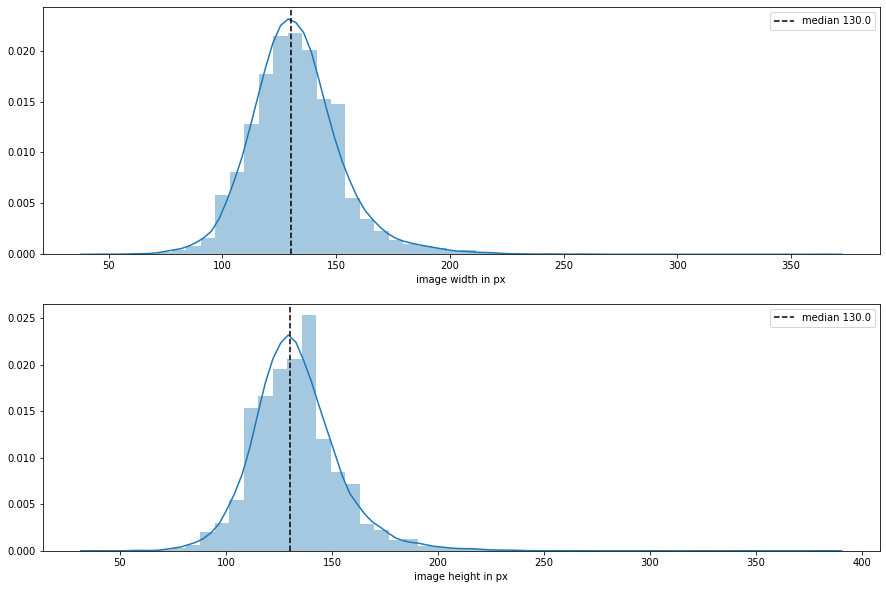

In [10]:
# Distribution by X value
fig = plt.figure(figsize=(15, 10))
s1 = fig.add_subplot(2,1,1)
sns.distplot(df['x'], axlabel="image width in px")
plt.axvline(x_median, color='k', label="median " + str(x_median), linestyle='--')

# Distribution by Y value
s2 = fig.add_subplot(2,1,2)
sns.distplot(df['y'], axlabel="image height in px")
plt.axvline(y_median, color='k', label="median " + str(y_median), linestyle='--')

s1.legend()
s2.legend()

fig.show()

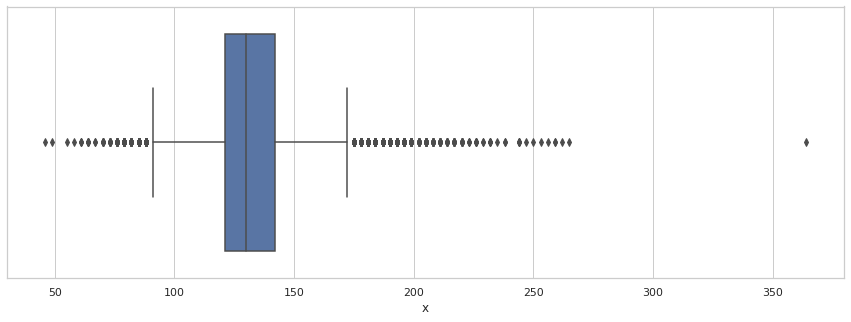

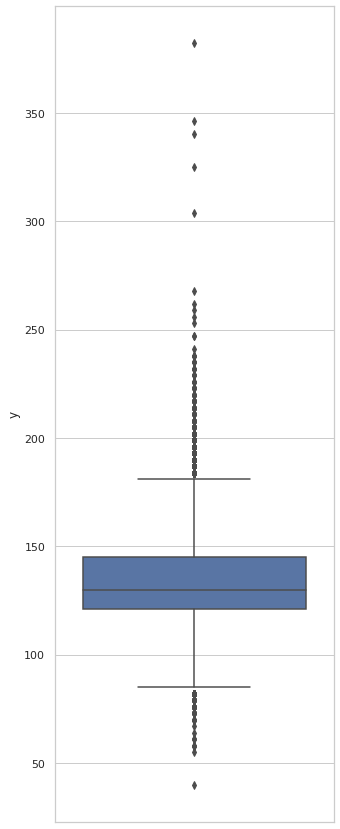

In [17]:
fig = plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
sns.boxplot(x=df['x'])
plt.show()

fig = plt.figure(figsize=(5, 15))
sns.boxplot(y=df['y'])
fig.show()